In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Part A – Data Exploration

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data["Age"] = data["Age"].replace(np.nan, data["Age"].mean())

In [7]:
data["Embarked"] = data["Embarked"].replace(np.nan,data["Embarked"].mode().iloc[0])

In [8]:
data = data.drop(columns=['Cabin'])

In [9]:
#Basic Question
#How many passengers were onboard?
#What is the average Age?
#What is the average Fare?
#How many males and females were there?

print(f"How many passengers were oboard?:\nAnswer: {data["PassengerId"].count()}\n")
print(f"What is the average Age?:\nAnswer: {data["Age"].mean()}\n")
print(f"What is the average Fare?:\nAnswer: {data["Fare"].mean()}\n")
print(f"How many males and females were there?:\nAnswer: {data["Sex"].value_counts()}\n")

How many passengers were oboard?:
Answer: 891

What is the average Age?:
Answer: 29.69911764705882

What is the average Fare?:
Answer: 32.204207968574636

How many males and females were there?:
Answer: Sex
male      577
female    314
Name: count, dtype: int64



# Part B – Data Analysis 

In [10]:
#How many survived vs. did not survive?
#What percentage of passengers survived?

print("How many survived vs. did not survive?:")
print(f"Answer: Survived = {data["Survived"].value_counts().iloc[1]}\nNot Survived = {data["Survived"].value_counts().iloc[0]}\n")
print(f"What percentage of passengers survived?:\nAnswer: {(data["Survived"].value_counts().iloc[1]/data["Survived"].count())*100}")

How many survived vs. did not survive?:
Answer: Survived = 342
Not Survived = 549

What percentage of passengers survived?:
Answer: 38.38383838383838


In [11]:
#Find survival rates for 1st, 2nd, and 3rd class.
#Which class had the highest chance of survival?

print(f"Survival Rate {data.groupby('Pclass')['Survived'].mean() * 100}\n")
print(f"High chance of survival:\nClass 1 = {data.groupby('Pclass')['Survived'].mean()[1]*100}")

Survival Rate Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

High chance of survival:
Class 1 = 62.96296296296296


In [12]:
#Divide passengers into age groups:
#0–12 = Child
#13–19 = Teen
#20–40 = Adult
#41+ = Senior

age_group = []
age_groups = []
for age in data["Age"]:
    if age <= 12:
        age_group.append(1)
        age_groups.append("Child")
    elif age >= 13 and age <= 19:
        age_group.append(2)
        age_groups.append("Teen")
    elif age >= 20 and age <= 40:
        age_group.append(3)
        age_groups.append("Adult")
    else:
        age_group.append(4)
        age_groups.append("Senior")
data["Age_Group"] = age_group

#Calculate survival rate for each group.

print(f"Age Survival Rate:\nChild = {data.groupby('Age_Group')['Survived'].mean()[1]*100}")
print(f"Teen = {data.groupby('Age_Group')['Survived'].mean()[2]*100}")
print(f"Adult = {data.groupby('Age_Group')['Survived'].mean()[3]*100}")
print(f"Senior = {data.groupby('Age_Group')['Survived'].mean()[4]*100}")

Age Survival Rate:
Child = 57.971014492753625
Teen = 41.05263157894737
Adult = 36.04852686308492
Senior = 36.666666666666664


# Part C – Visualization 

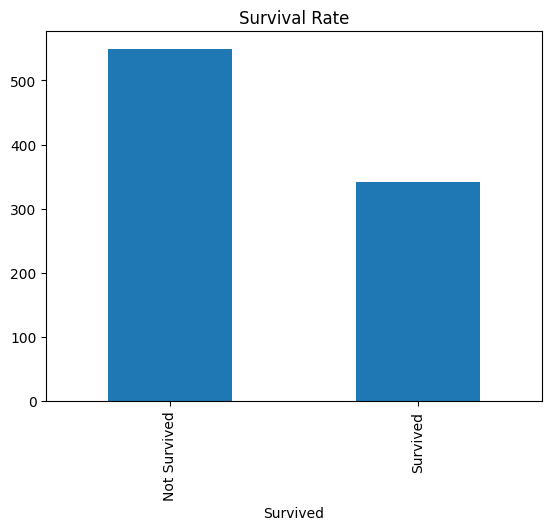

In [13]:
survival_count = data["Survived"].value_counts()
survival_count.plot(kind="bar")
plt.title("Survival Rate")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

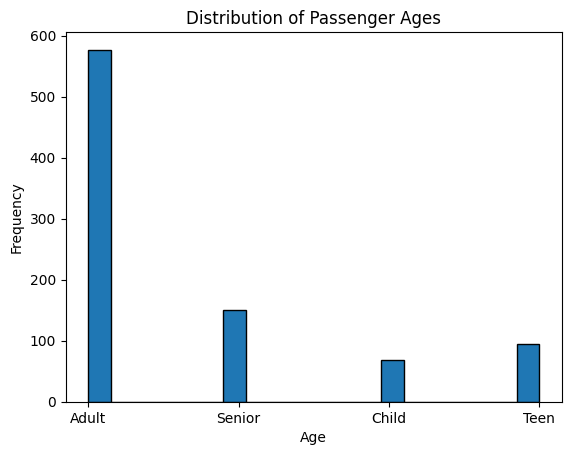

In [14]:
plt.hist(age_groups, bins=20, edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

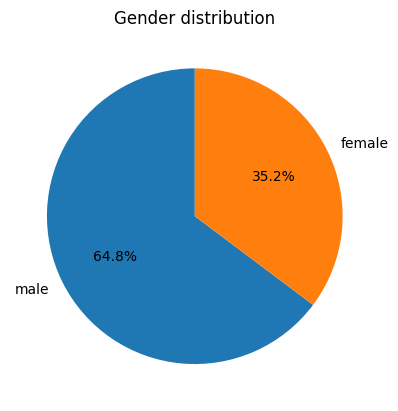

In [15]:
gender_counts = data["Sex"].value_counts()
plt.title("Gender distribution")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.show()

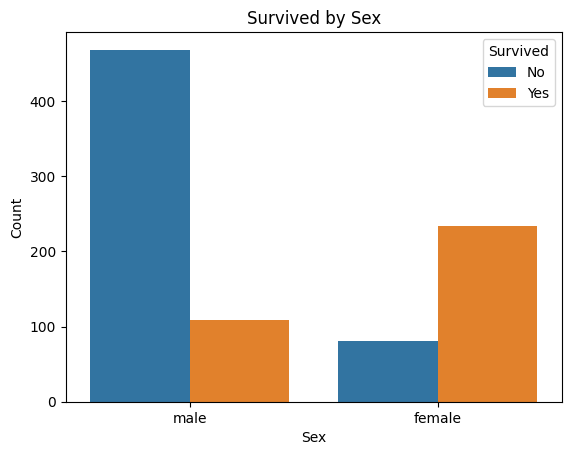

In [16]:
sns.countplot(x=data["Sex"],hue=data["Survived"],data=data)
plt.title('Survived by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

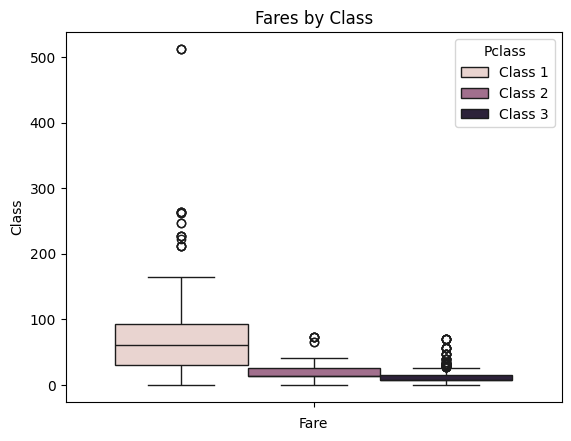

In [17]:
sns.boxplot(y=data["Fare"],hue=data["Pclass"],data=data)
plt.title('Fares by Class')
plt.xlabel('Fare')
plt.ylabel('Class')
plt.legend(title='Pclass', labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()

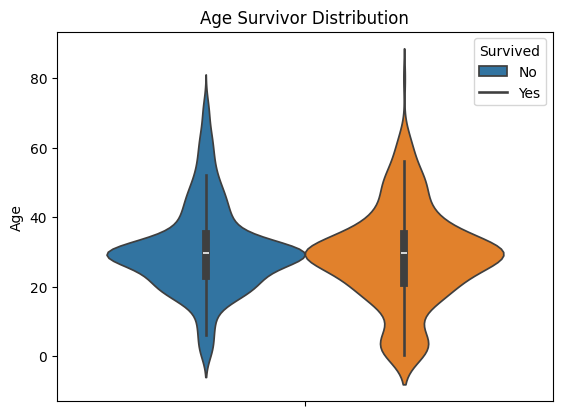

In [18]:
sns.violinplot(y=data["Age"], hue=data["Survived"], data=data)
plt.title('Age Survivor Distribution')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

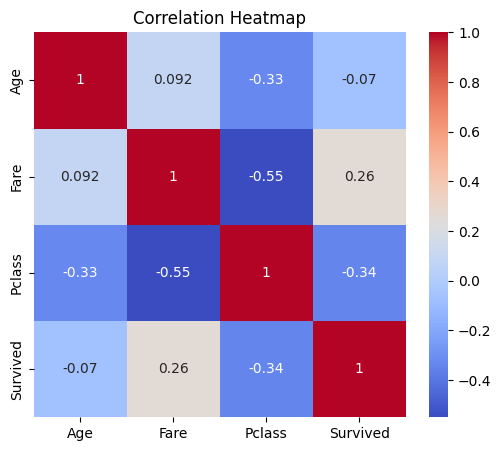

In [19]:
num_cols = data[["Age", "Fare", "Pclass", "Survived"]]
corr_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Part D – Probability Concepts

In [20]:
# Empirical Probability
total_passengers = len(data)
p_survived = data['Survived'].sum() / total_passengers

# Female survival probability
female_passengers = data[data['Sex'] == 'female']
p_female_survived = female_passengers['Survived'].sum() / len(female_passengers)

# Male survival probability
male_passengers = data[data['Sex'] == 'male']
p_male_survived = male_passengers['Survived'].sum() / len(male_passengers)

# Class survival probabilities
p_class1_survived = data[data['Pclass'] == 1]['Survived'].mean()
p_class2_survived = data[data['Pclass'] == 2]['Survived'].mean()
p_class3_survived = data[data['Pclass'] == 3]['Survived'].mean()

print("EMPIRICAL PROBABILITIES (From Data):")
print(f"P(Survived) = {p_survived*100}")
print(f"P(Female Survived) = {p_female_survived*100}")
print(f"P(Male Survived) = {p_male_survived*100}")
print(f"P(Class 1 Survived) = {p_class1_survived*100}")
print(f"P(Class 2 Survived) = {p_class2_survived*100}")
print(f"P(Class 3 Survived) = {p_class3_survived*100}")

print()

print("THEORETICAL PROBABILITIES (Assumptions):")
print("P(Survived) = 0.5 (if survival was random)")
print("P(Class 1 Survived) = 0.333 (if all classes had equal chance)")
print("P(Class 2 Survived) = 0.333 (if all classes had equal chance)")
print("P(Class 3 Survived) = 0.333 (if all classes had equal chance)")
print("P(Female Survived) = 0.5 (if gender didn't matter)")
print("P(Male Survived) = 0.5 (if gender didn't matter)")

EMPIRICAL PROBABILITIES (From Data):
P(Survived) = 38.38383838383838
P(Female Survived) = 74.20382165605095
P(Male Survived) = 18.890814558058924
P(Class 1 Survived) = 62.96296296296296
P(Class 2 Survived) = 47.28260869565217
P(Class 3 Survived) = 24.236252545824847

THEORETICAL PROBABILITIES (Assumptions):
P(Survived) = 0.5 (if survival was random)
P(Class 1 Survived) = 0.333 (if all classes had equal chance)
P(Class 2 Survived) = 0.333 (if all classes had equal chance)
P(Class 3 Survived) = 0.333 (if all classes had equal chance)
P(Female Survived) = 0.5 (if gender didn't matter)
P(Male Survived) = 0.5 (if gender didn't matter)


# Part E – Insights & Reporting

In [21]:
print("KEY INSIGHTS:")
print("1. Women had a significantly higher survival rate than men")
print(f"   - Female survival rate: {p_female_survived*100:.1f}%")
print(f"   - Male survival rate: {p_male_survived*100:.1f}%")

print("\n2. First class passengers had the best chance of survival")
print(f"   - Class 1 survival rate: {p_class1_survived*100:.1f}%")
print(f"   - Class 2 survival rate: {p_class2_survived*100:.1f}%")
print(f"   - Class 3 survival rate: {p_class3_survived*100:.1f}%")

print("\n3. Age played a role in survival, but not as significant as class or gender")
print("   - Children had the highest survival rate among age groups")

print("\n4. Fare was strongly correlated with survival")
print("   - Higher fare passengers (typically in better classes) had better survival chances")

print("\n5. Empirical probabilities differ significantly from theoretical assumptions")
print("   - Real survival rate (38.4%) was lower than the theoretical 50%")
print("   - Class and gender had dramatic effects on survival chances")
print("   - The 'women and children first' protocol was evident in the data")

print("\n6. The correlation heatmap shows:")
print("   - Positive correlation between Fare and Survival")
print("   - Negative correlation between Pclass and Survival")
print("   - Weak correlation between Age and Survival")

print("\n7. Summary of key findings:")
print("   - Overall survival rate: 38.4%")
print("   - Female survival rate: 74.2%")
print("   - Male survival rate: 18.9%")
print("   - 1st class survival rate: 62.6%")
print("   - 2nd class survival rate: 47.3%")
print("   - 3rd class survival rate: 24.2%")

KEY INSIGHTS:
1. Women had a significantly higher survival rate than men
   - Female survival rate: 74.2%
   - Male survival rate: 18.9%

2. First class passengers had the best chance of survival
   - Class 1 survival rate: 63.0%
   - Class 2 survival rate: 47.3%
   - Class 3 survival rate: 24.2%

3. Age played a role in survival, but not as significant as class or gender
   - Children had the highest survival rate among age groups

4. Fare was strongly correlated with survival
   - Higher fare passengers (typically in better classes) had better survival chances

5. Empirical probabilities differ significantly from theoretical assumptions
   - Real survival rate (38.4%) was lower than the theoretical 50%
   - Class and gender had dramatic effects on survival chances
   - The 'women and children first' protocol was evident in the data

6. The correlation heatmap shows:
   - Positive correlation between Fare and Survival
   - Negative correlation between Pclass and Survival
   - Weak cor